In [1]:
import numpy as np
from matplotlib.pylab import *
import pandas as pd

In [2]:
rcParams.update({'font.size':21})

In [3]:
data = pd.read_csv('covid_19_data.csv')

In [4]:

data['Date'] = data['ObservationDate'].apply(pd.to_datetime)
data.drop(['SNo'],axis=1,inplace=True)

In [5]:
data.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
6157,03/16/2020,Cayman Islands,UK,2020-03-16T14:53:04,1.0,1.0,0.0,2020-03-16
6158,03/16/2020,Gibraltar,UK,2020-03-14T16:33:03,1.0,0.0,1.0,2020-03-16
6159,03/16/2020,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0,2020-03-16
6160,03/16/2020,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0,2020-03-16
6161,03/16/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0,2020-03-16


In [6]:
countries = data['Country/Region'].unique().tolist()
len(countries)

171

In [7]:
data_new ={}
for name in countries:
    a = data[data['Country/Region']==name].groupby('Date').sum()
    data_new[name] = a.to_numpy()

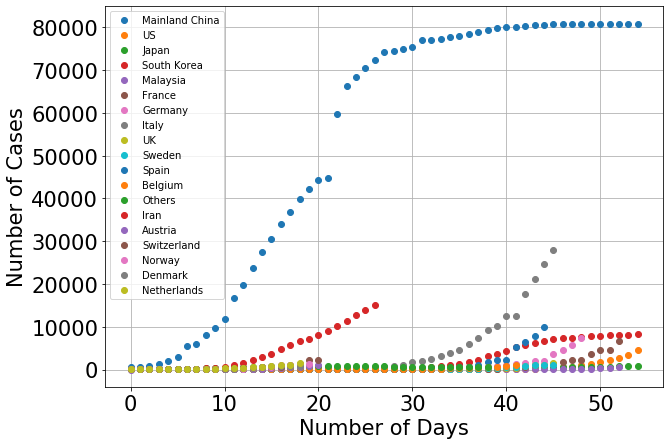

In [8]:
figure(figsize=(10,7))
large_cases = []
for name in countries:
    confirm = data_new[name][:,0]
    if confirm[-1] > 500:
        plot(confirm, 'o', label =name)
        large_cases.append(name)
legend(fontsize=10)
xlabel('Number of Days')
ylabel('Number of Cases')
grid('on')
show()


In [9]:
print('Number of cases with greater than 500 confirmed cases:', len(large_cases))
large_cases

Number of cases with greater than 500 confirmed cases: 19


['Mainland China',
 'US',
 'Japan',
 'South Korea',
 'Malaysia',
 'France',
 'Germany',
 'Italy',
 'UK',
 'Sweden',
 'Spain',
 'Belgium',
 'Others',
 'Iran',
 'Austria',
 'Switzerland',
 'Norway',
 'Denmark',
 'Netherlands']

# A More Detailed Look at China Cases

In [168]:
from scipy.optimize import curve_fit

limit = 55
china_conf = data_new['Mainland China'][:,0][0:limit]
china_ded = data_new['Mainland China'][:,1][0:limit]
china_rev = data_new['Mainland China'][:,2][0:limit]

In [169]:
# Perform exponential fit for data 
def func(x, a, b, c, d):
    return a/(d + b*np.exp(-c * x))

xdata = np.arange(0,len(china_conf),1)
popt, pcov = curve_fit(func, xdata, china_conf)

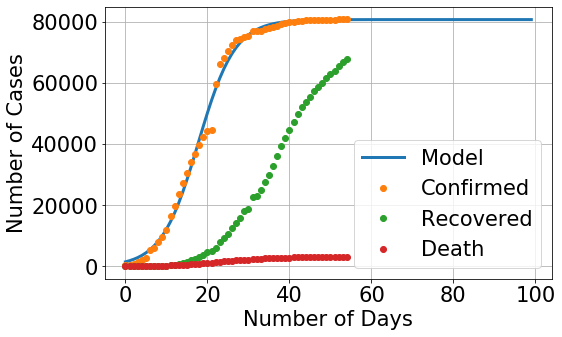

In [170]:
figure(figsize=(8,5))
x_100 = np.arange(0,100,1)
plot(x_100, func(x_100, *popt), label='Model', linewidth=3)
plot(xdata, china_conf, 'o', label='Confirmed')
plot(xdata, china_rev, 'o', label='Recovered')
plot(xdata, china_ded, 'o', label='Death')
legend()
xlabel('Number of Days')
ylabel('Number of Cases')
grid('on')
show()

In [152]:
#Build a function to plot and fit any countries
def covid(name,days, start, stop):
    name_conf = data_new[name][:,0][start:stop]
    name_ded = data_new[name][:,1][start:stop]
    name_rev = data_new[name][:,2][start:stop]
    # Perform exponential fit for data 
    def func(x, a, b, c, d):
        return a/(d + b*np.exp(-c * x))

    xdata = np.arange(0,len(name_conf),1)
    x_100 = np.arange(0, days,1)
    popt, pcov = curve_fit(func, xdata, name_conf)
    figure(figsize=(7,4))
    plot(x_100, func(x_100, *popt), label='Model', linewidth=3)
    plot(xdata, name_conf, 'o', label='Confirmed')
    plot(xdata, name_rev, 'o', label='Recovered')
    plot(xdata, name_ded, 'o', label='Death')
    legend()
    xlabel('Number of Days')
    ylabel('Number of Cases')
    title(name)
    grid('on')
    show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


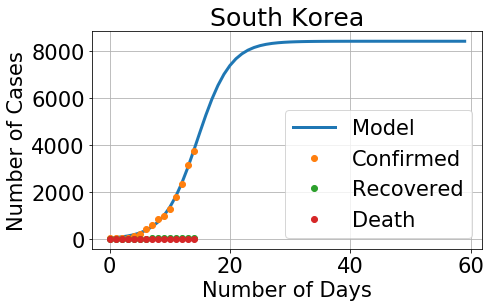

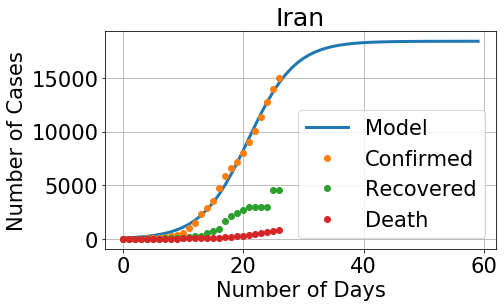

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


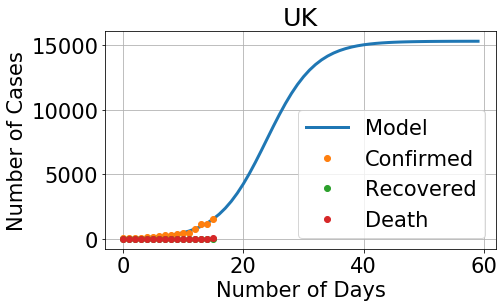

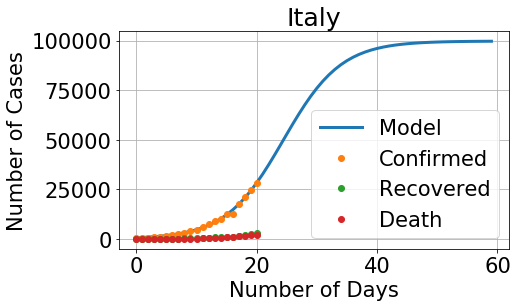

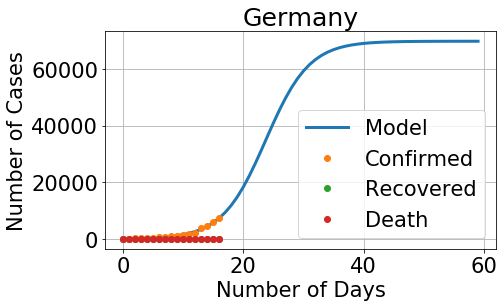

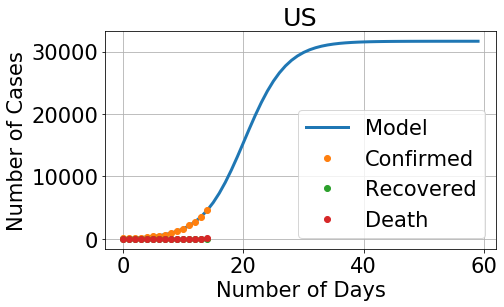

In [153]:
covid('South Korea',60,25,40)
covid('Iran',60,0,30)
covid('UK',60,30, 60)
covid('Italy',60,25,60)
covid('Germany',60,32,50)
covid('US',60,40,60)

In [22]:
figure(figsize=(8,5))
total_conf =[]
total_ded = []
total_rev = []
for name in large_cases:
    total_conf.append(data_new[name][-1,0])
    total_ded.append(data_new[name][-1,1])
    total_rev.append(data_new[name][-1,2])
total_conf = np.array(total_conf)
total_ded = np.array(total_ded)
total_rev = np.array(total_rev)
large_cases = np.array(large_cases)

<Figure size 576x360 with 0 Axes>

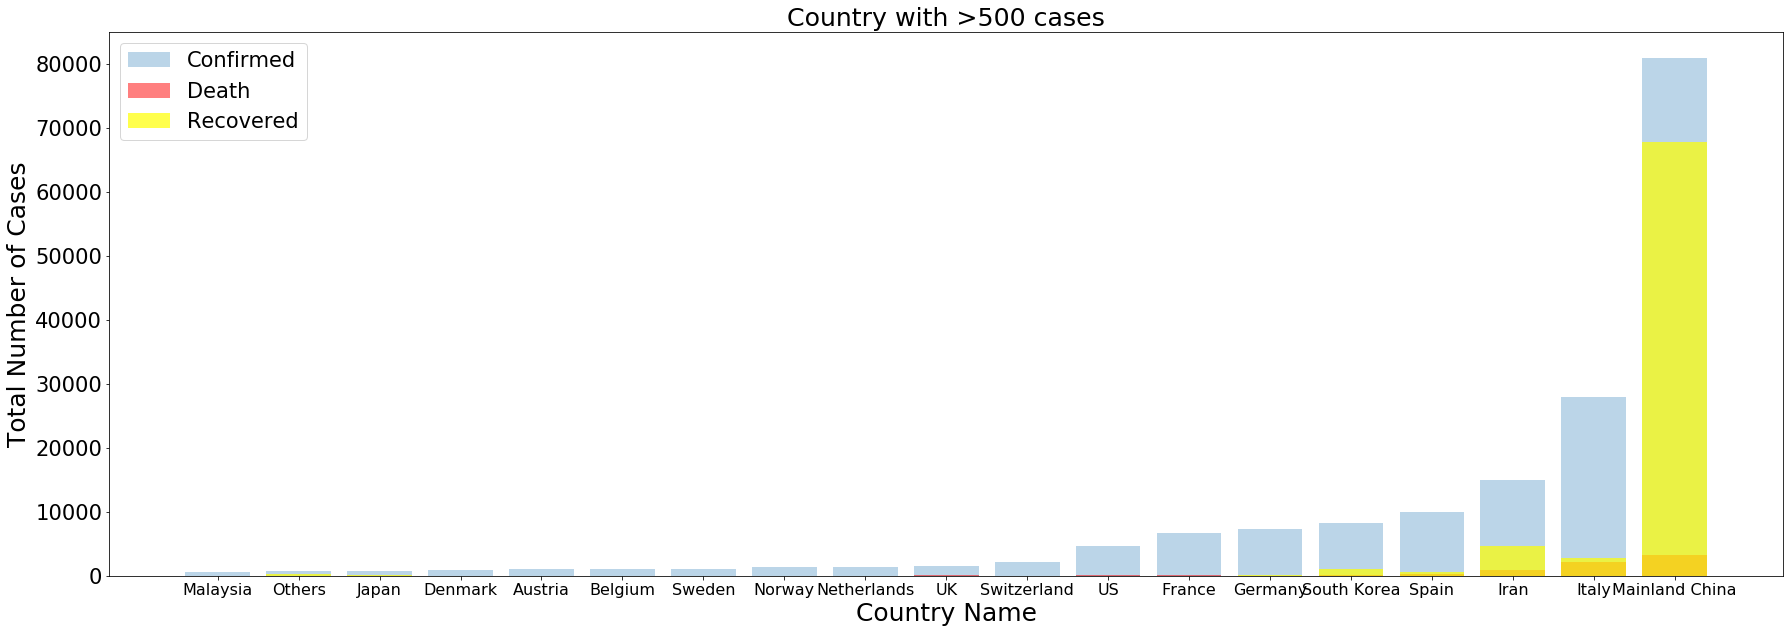

<Figure size 432x288 with 0 Axes>

In [58]:
figure(figsize=(30,10))
id = np.argsort(total_conf)

bar(np.arange(len(large_cases)), total_conf[id], align='center', alpha=0.3, label='Confirmed')
bar(np.arange(len(large_cases)), total_ded[id], align='center', alpha = 0.5, label = 'Death', color= 'red')
bar(np.arange(len(large_cases)), total_rev[id], align='center', alpha= 0.7, label='Recovered', color ='yellow')

xticks(np.arange(len(large_cases)), large_cases[id], fontsize=16)
xlabel('Country Name', fontsize=25)
ylabel('Total Number of Cases', fontsize=25)
title('Country with >500 cases')
legend()
show()
tight_layout()

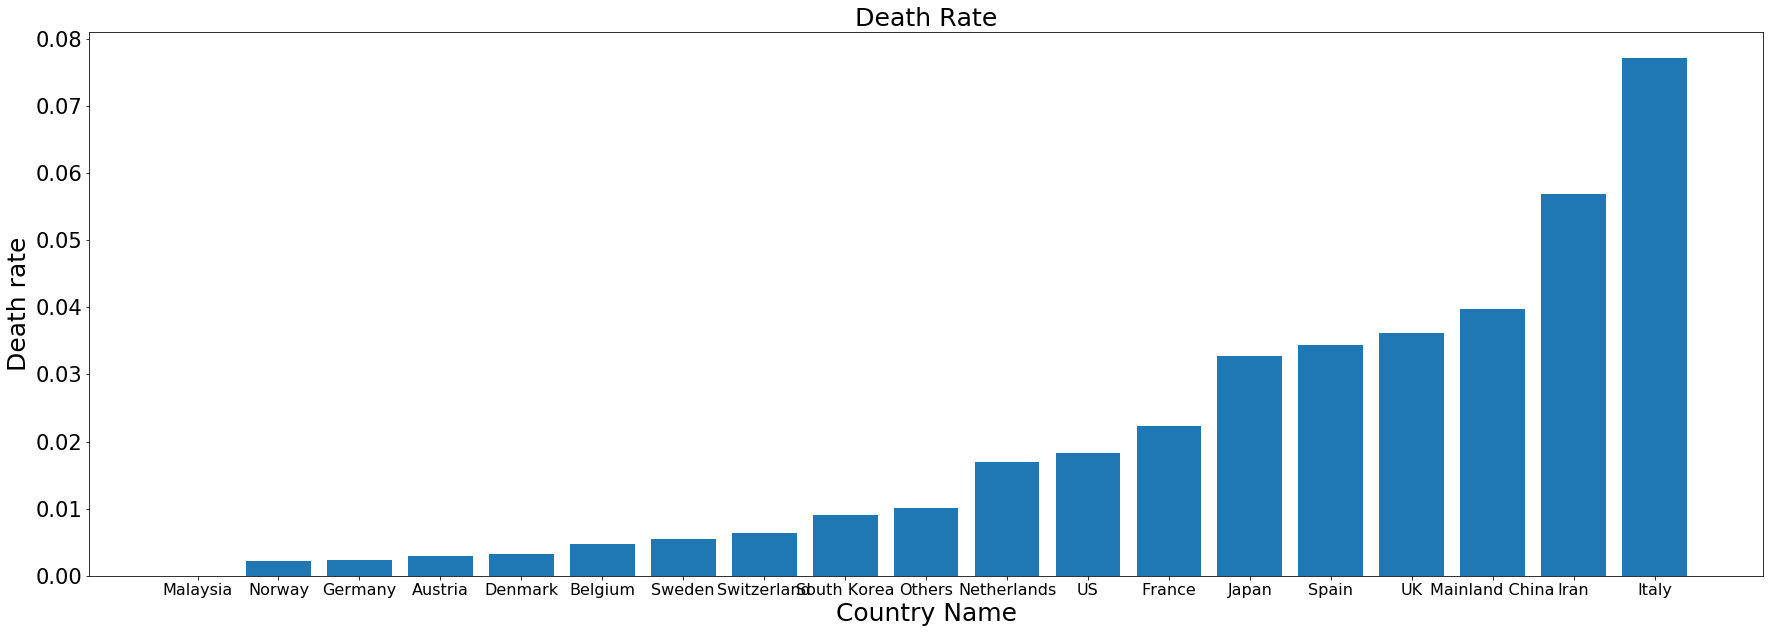

<Figure size 432x288 with 0 Axes>

In [120]:
figure(figsize=(30,10))
ded_rate = total_ded/total_conf
idd = np.argsort(ded_rate)
bar(np.arange(len(large_cases)),ded_rate[idd], align='center')
xticks(np.arange(len(large_cases)), large_cases[idd], fontsize=16)
ylabel('Death rate', fontsize=25)
xlabel('Country Name', fontsize=25)
title('Death Rate')
show()
tight_layout()

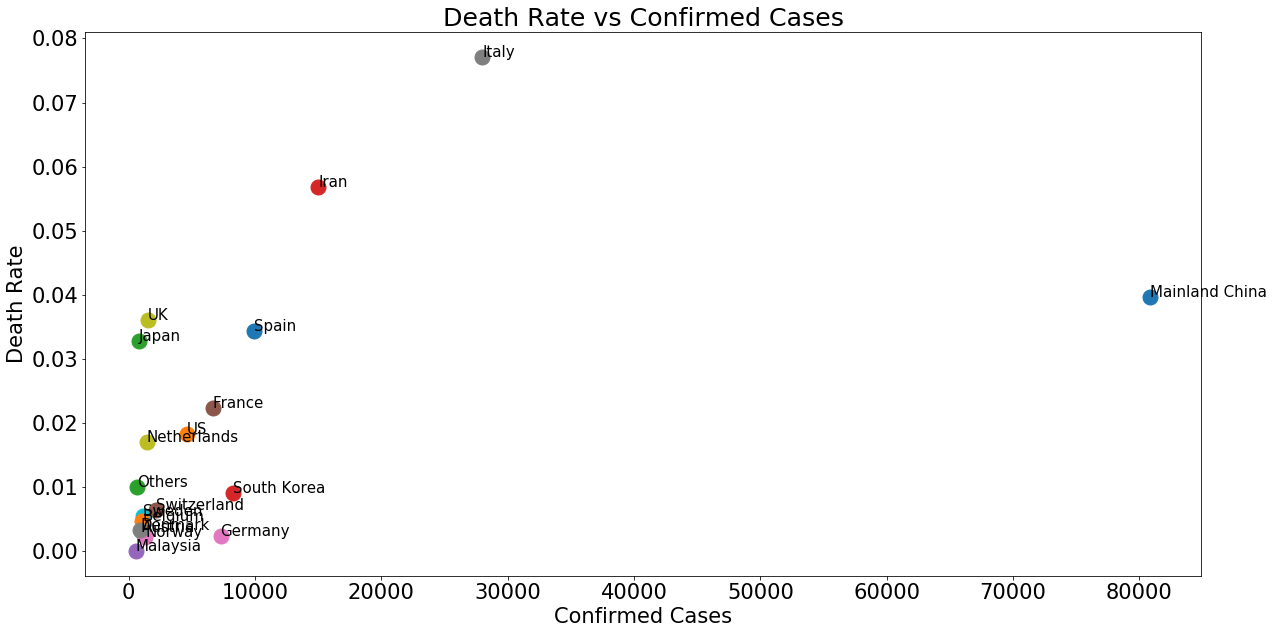

<Figure size 432x288 with 0 Axes>

In [147]:
figure(figsize=(20,10))
for i in range(len(ded_rate)):
    plot(total_conf[i], ded_rate[i], 'o', markersize=15)
    text(total_conf[i], ded_rate[i], large_cases[i], fontsize=15)
xlabel('Confirmed Cases')
ylabel('Death Rate')
title('Death Rate vs Confirmed Cases')
show()
tight_layout()


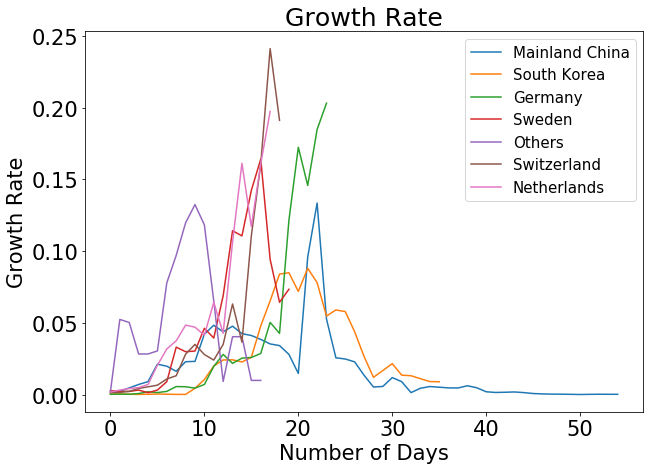

In [156]:
grow_rate = np.zeros(len(large_cases))
figure(figsize=(10,7))
i = 0
for name in large_cases:
    rate = np.gradient(data_new[name][:,0])
    rate = rate[rate>1]/np.max(data_new[name][:,0])
    if i%3 ==0:
        plot(rate, label=name)
    grow_rate[i] = np.mean(rate)
    i+=1
ylabel('Growth Rate')    
xlabel('Number of Days')
title('Growth Rate')
legend(fontsize=15)

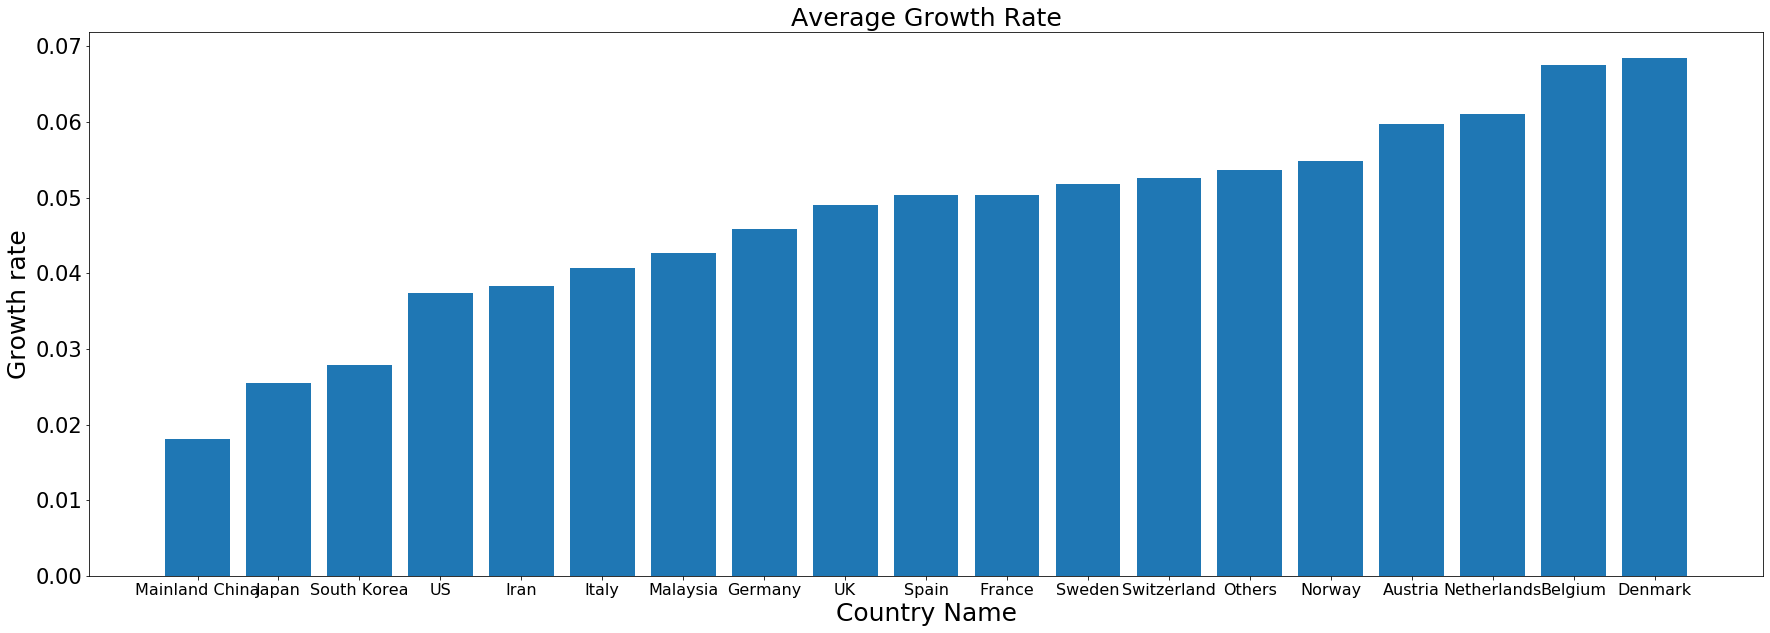

<Figure size 432x288 with 0 Axes>

In [119]:
idr = np.argsort(grow_rate)
figure(figsize=(30,10))
bar(np.arange(len(large_cases)),grow_rate[idr], align='center')
xticks(np.arange(len(large_cases)), large_cases[idr], fontsize=16)
ylabel('Growth rate', fontsize=25)
xlabel('Country Name', fontsize=25)
title('Average Growth Rate')
show()
tight_layout()

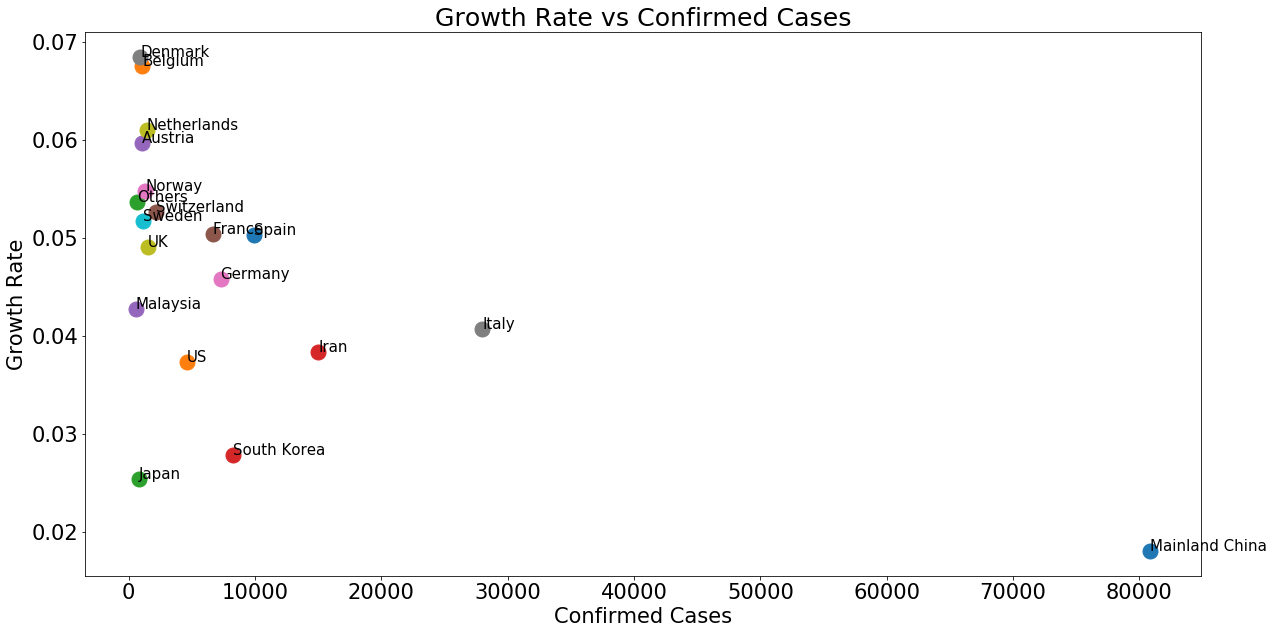

<Figure size 432x288 with 0 Axes>

In [149]:
figure(figsize=(20,10))
for i in range(len(ded_rate)):
    plot(total_conf[i], grow_rate[i], 'o', markersize=15)
    text(total_conf[i], grow_rate[i], large_cases[i], fontsize=15)
xlabel('Confirmed Cases')
ylabel('Growth Rate')
title('Growth Rate vs Confirmed Cases')
show()
tight_layout()

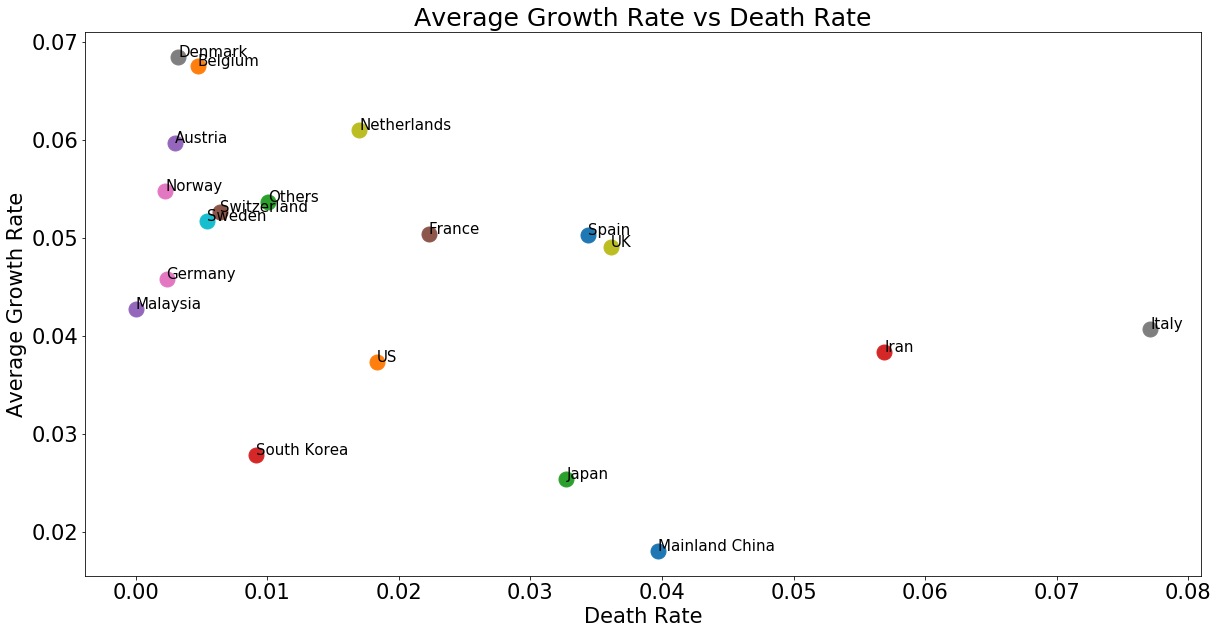

<Figure size 432x288 with 0 Axes>

In [158]:
figure(figsize=(20,10))
for i in range(len(ded_rate)):
    plot(ded_rate[i], grow_rate[i], 'o', markersize=15)
    text(ded_rate[i], grow_rate[i], large_cases[i], fontsize=15)
xlabel('Death Rate')
ylabel('Average Growth Rate')
title('Average Growth Rate vs Death Rate')
show()
tight_layout()